<img src="../logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 4
#### Lugano Damian

## Consigna

<img src="./pics/consignaTS4.png" align="center" width="600" />

1.Obtener la transferencia de máxima planicidad del filtro requerido.

2.Obtener el diagrama de polos y ceros, y un bosquejo de la respuesta en frecuencia. Compare el diagrama de polos y ceros con el del filtro pasabajo prototipo.

3.Implementar el circuito normalizado con estructuras pasivas. (Puede utilizar dispositivos activos para separar secciones).

4.Reemplace los inductores en las estructuras pasivas mediante el GIC de Antoniou, en la configuración que considere más apropiada.

Bonus:

+10 💎 Simulación numérica y circuital.
+10  🍺 Presentación en jupyter notebook

## Resolución 

In [15]:
from IPython.display import IFrame
IFrame("./docs/TS4.pdf", width=950, height=1000)

## Simulación numérica y circuital

### Simulación numérica en python

La simulación numérica se realizó en python y se utilizó el siguiente script para comprobar los calculos realizados:

In [16]:
## Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys, pretty_print_lti, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle

In [17]:
##Plantilla del filtro pasa bajos prototipo

#wp=1
ws=4
alfa_max=1
alfa_min=30

#### Transferencia factorizada y parametrizada del Butter de tercer orden

<IPython.core.display.Math object>

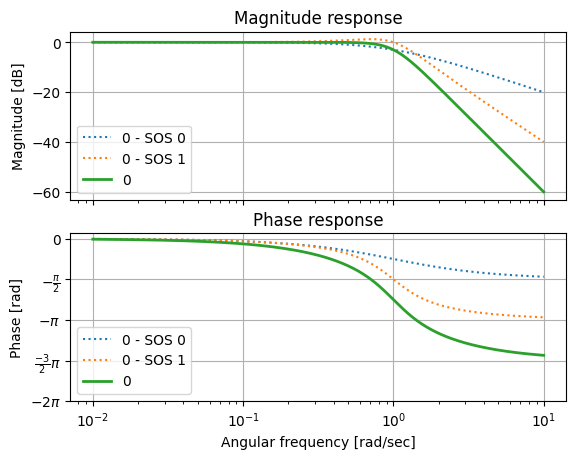

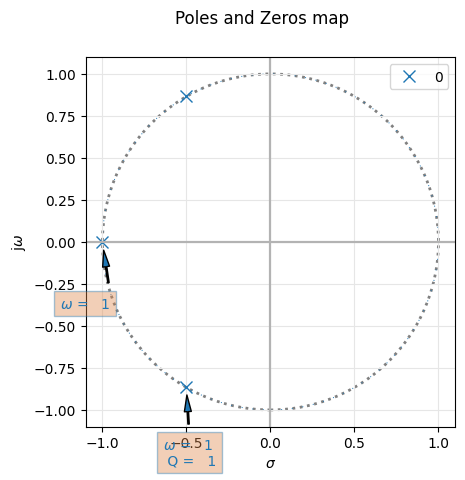

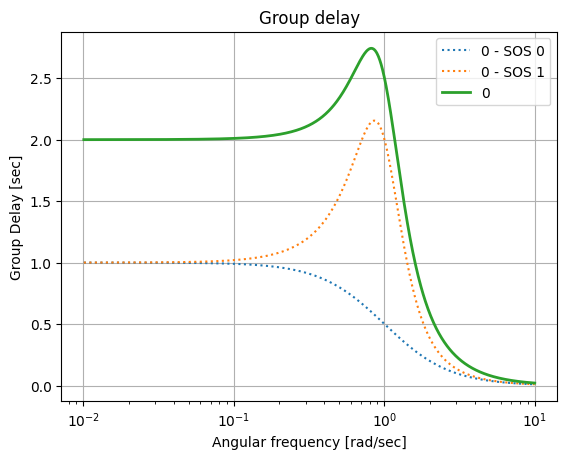

In [18]:
## Filtro pasa bajos Butterworth de tercer orden
ee = ( np.sqrt( 10**(alfa_max / 10) - 1 ))    #Por lo general w_p=1

order=np.ceil( 0.5 * ( np.log10( ( 10**(alfa_min * 0.1) - 1 ) / ee**2)  / np.log10(ws) ) ) 

z,p,k = sig.buttap (order)
N, D = sig.zpk2tf(z, p, k)

print_subtitle('Transferencia factorizada y parametrizada del Butter de tercer orden')
sos_lp = tf2sos_analog(N, D)
sos_lp[sos_lp < 1e-6] = 0.0
pretty_print_SOS(sos_lp)

analyze_sys(sos_lp)

#### Transferencia factorizada y parametrizada de filtro pasa bajo de máxima planicidad

<IPython.core.display.Math object>

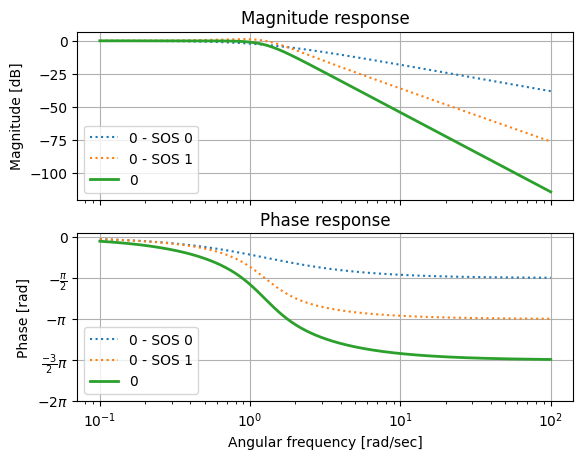

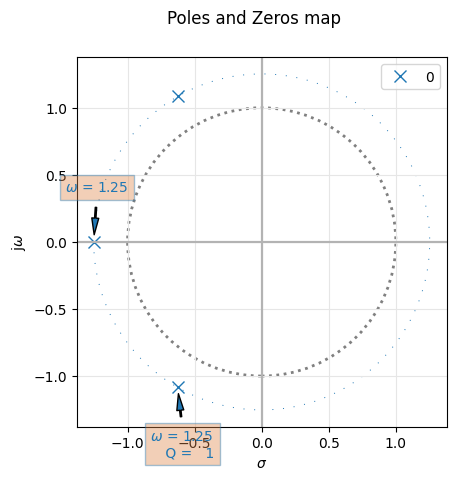

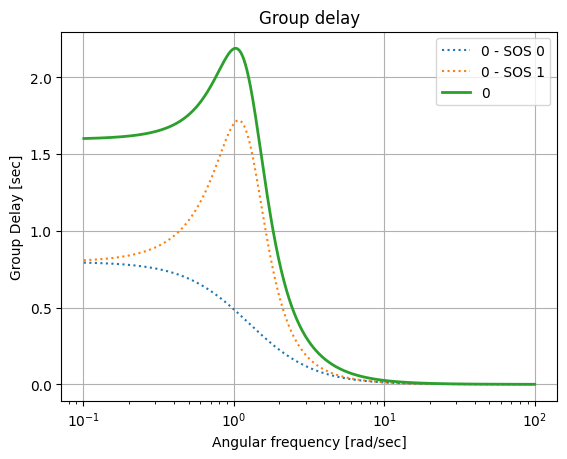

In [19]:
## Desnormalización del filtro Butter a un filtro de MP

N, D = sig.lp2lp(N, D, ee**(-1/order) ) #Esta funcion cambia el wo del filtro de MP

print_subtitle('Transferencia factorizada y parametrizada de filtro pasa bajo de máxima planicidad')
sos_flp = tf2sos_analog(N, D)
sos_flp[sos_flp < 1e-6] = 0.0
pretty_print_SOS(sos_flp)

analyze_sys(sos_flp)

#### Transferencia factorizada y parametrizada de filtro pasa alto de máxima planicidad

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

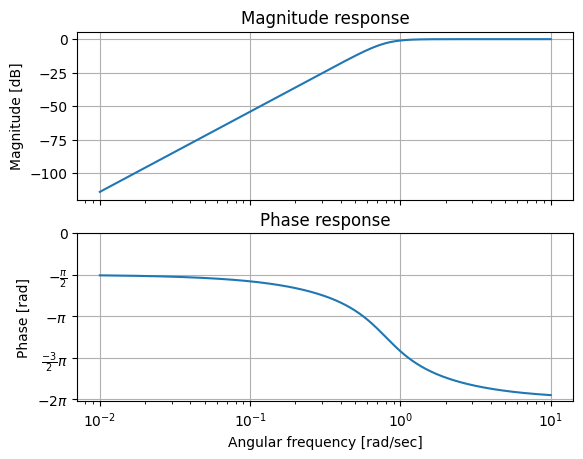

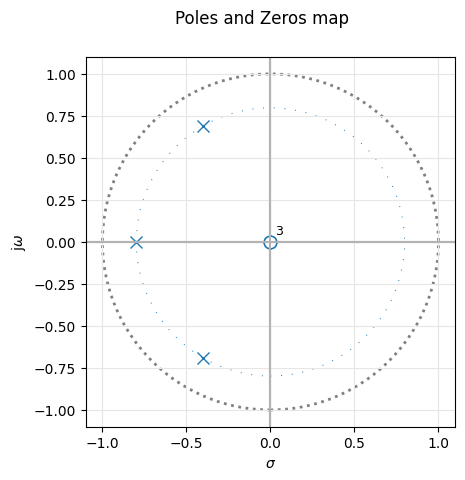

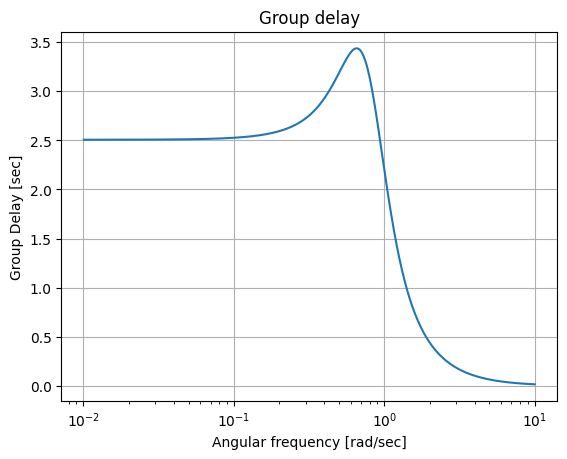

In [20]:
## Transformación del filtro pasa-bajos al filtro-pasa altos

N,D = sig.lp2hp(N,D)
    
print_subtitle('Transferencia factorizada y parametrizada de filtro pasa alto de máxima planicidad')

T = TransferFunction(N, D)
bodePlot(T, fig_id=1)
pzmap(T, fig_id=2 )
GroupDelay(T, fig_id=3)

### Simulación circuital en LTspice

#### Circuito pasa alto pasivo

<img src="./pics/circ_pasivo.png" align="center" width="1000" />

#### Circuito pasa alto activo

<img src="./pics/circ_activo.png" align="center" width="1000" />
<img src="./pics/graf_activo.png" align="center" width="1000" />

## Conclusiones

A partir del presente trabajo semanal se pudo practicar la transformación de una plantilla para un pasa-altos a un pasa-bajos, para luego diseñar un pasa-bajos prototipos que cumpla con las indicaciones propuestas y a partir de ello volver a transformar dicho prototipo para que resulte en el filtro pasa-altos deseado. 

Principalmente se comprobó que la desnormalización de $\omega_B$ antes o despues de la transformación llegan al mismo resultado, aunque habrá que ser consistentes con el nucleo de transformación pasa-altos. Es decir, si se desnormaliza antes de transformar se debería reemplazar $\omega_0 = \xi^{-1/3}$ o si se desnormaliza despues de transformar se debería reemplazar entonces $\omega_0 = \xi^{1/3}$. Esto significa que el radio donde se encontrarán las singularidades en un pasa-bajos será la inversa del radio donde se encuentren las singularidades para el pasa-altos, en este caso particular de máxima planicidad.

Por último, se comprobó a partir de las simulaciones circuitales que el circuito pasivo tiene una respuesta en frecuencia idéntica al circuito activo. Si bien se puede notar pequeñas diferencias en los valores de atenuación para mismas frecuencias, estos se atribuyen a las no idealidades del OPAMP en el modelo utilizado.